## Image Classification

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
import h5py

In [2]:
train_folder = 'images/train' 
test_folder = 'images/test/' 
val_folder = 'images/val/' 


train_imgs = []
train_labels = []

test_imgs = []
test_labels = []

val_imgs = []
val_labels = []

label = 'dog'

In [3]:
for image in os.listdir(train_folder):
    if image.endswith(('.jpg')):
        path = os.path.join(train_folder, image)
        image = cv2.imread(path)
        if image is not None:
            image = cv2.resize(image, (200, 200))
            train_imgs.append(image)
            #labels_dogs_and_cats.append(index)
        else:
            print(path)

print(type(train_imgs), type(train_labels))
print(len(train_imgs), len(train_labels))

<class 'list'> <class 'list'>
121 0


In [4]:
for image in os.listdir(test_folder):
    if image.endswith(('.jpg')):
        path = os.path.join(test_folder, image)
        image = cv2.imread(path)
        if image is not None:
            image = cv2.resize(image, (200, 200))
            test_imgs.append(image)
            #labels_dogs_and_cats.append(index)
        else:
            print(path)

print(type(test_imgs), type(test_labels))
print(len(test_imgs), len(test_labels))

<class 'list'> <class 'list'>
30 0


In [5]:
for image in os.listdir(val_folder):
    if image.endswith(('.jpg')):
        path = os.path.join(val_folder, image)
        image = cv2.imread(path)
        if image is not None:
            image = cv2.resize(image, (200, 200))
            val_imgs.append(image)
            #labels_dogs_and_cats.append(index)
        else:
            print(path)

print(type(val_imgs), type(val_labels))
print(len(val_imgs), len(val_labels))

<class 'list'> <class 'list'>
20 0


In [6]:
train_imgs = np.array(train_imgs)
test_imgs = np.array(test_imgs)
val_imgs = np.array(val_imgs)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

print(type(train_imgs), type(train_labels))
print(train_imgs.shape, train_labels.shape)

print(type(test_imgs), type(test_labels))
print(test_imgs.shape, test_labels.shape)

print(type(val_imgs), type(val_labels))
print(val_imgs.shape, val_labels.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(121, 200, 200, 3) (0,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(30, 200, 200, 3) (0,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20, 200, 200, 3) (0,)


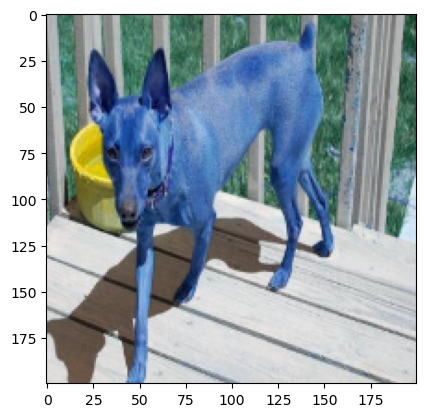

In [7]:
def ver_imagen(index):
    plt.imshow(test_imgs[index])
    plt.show()

ver_imagen(1)

In [8]:
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
import keras
import visualkeras

In [9]:
mobileNet_model = keras.applications.MobileNet(weights='imagenet', include_top = False, input_shape=(150,150,3))

#Avoid retrain
for layer in mobileNet_model.layers:
  layer.trainable = False

mobileNet_model.summary()

2023-11-24 17:53:19.758929: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-24 17:53:19.758949: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-24 17:53:19.758952: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-24 17:53:19.759542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-24 17:53:19.759827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32) 

In [10]:
#plot_model(resnet_model, to_file='images/resnet_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

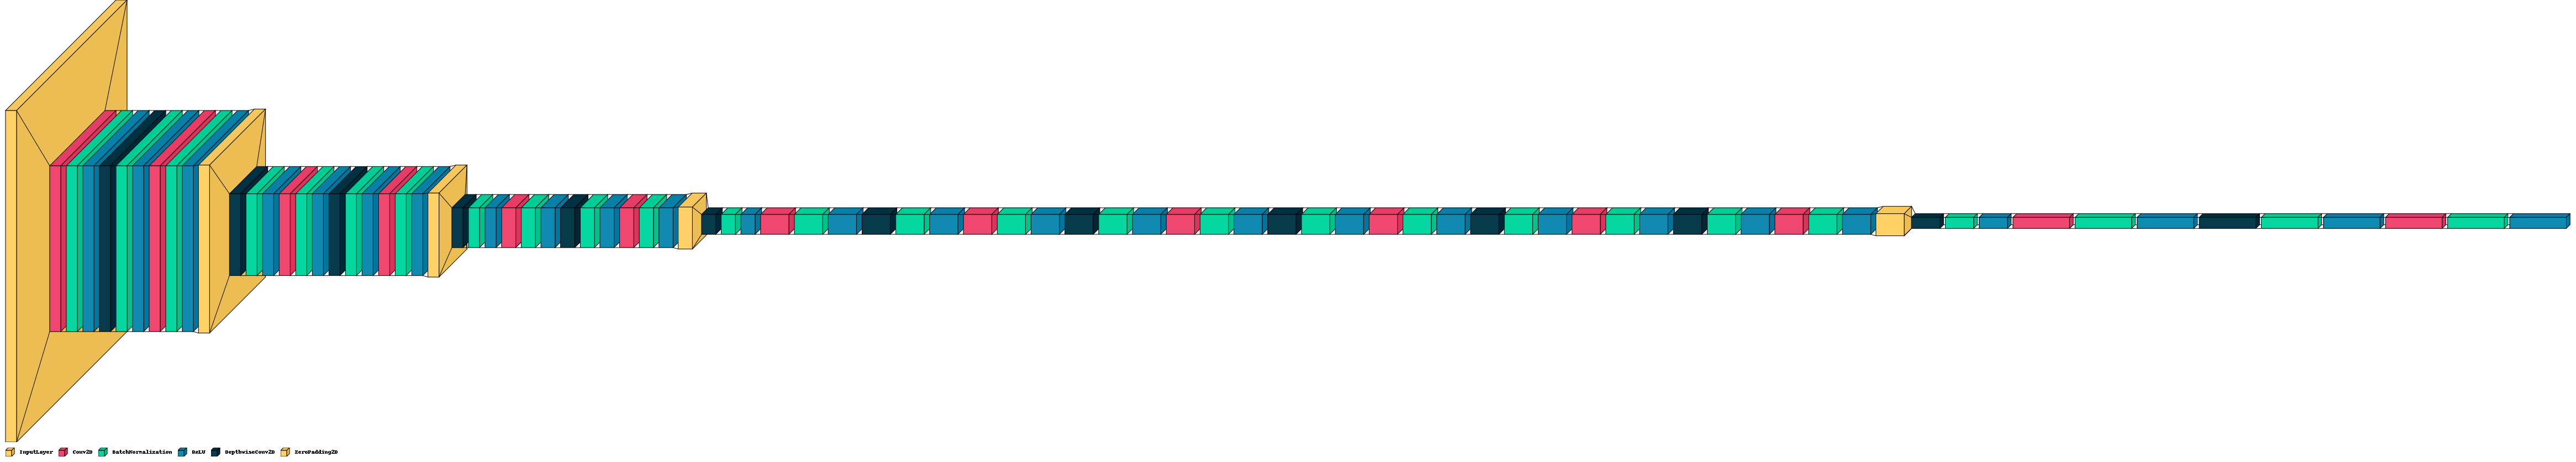

In [11]:
visualkeras.layered_view(mobileNet_model, legend=True)

In [12]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),  # Horizontal flip
    tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.17),  # Random rotation up to 30 degrees
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.15, width_factor=0.15),  # Random zoom up to 15%
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=.2, width_factor=.2),  # Random shear up to 20%
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255.0, input_shape=(150, 150, 3))
])

In [13]:
new_model = Sequential()

new_model.add(data_augmentation)
new_model.add(mobileNet_model)
new_model.add(Dense(120, activation = "sigmoid"))
new_model.add(Dense(90, activation = "sigmoid"))

new_model.add(Dense(2, activation = 'softmax'))

new_model.summary()


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
mobileNet_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_percentage_error',
    metrics = ['custom_metrics']
)

In [ ]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(len(X_val), len(y_val))

2800 2800
840 840
360 360


In [ ]:
model_history = mobileNet_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100


TypeError: in user code:

    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
plt.subplot(1,2,1)
plt.plot(epochs, historical.history['loss'], label = 'Trainning loss')
plt.plot(epochs, historical.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Trainning and validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, historical.history['accuracy'], label = 'Trainning accuracy')
plt.plot(epochs, historical.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Trainning and validation accuracy')
plt.legend()
plt.ylim(0, 1.1)